# ***Data Visualization and ODE model creation Tutorial***

Plankton is an organism that is carried by tides and currents and does not have the capabilites to swim well enough to fight against these forces. Plankton originates from the greek word for "drifter" or "wanderer". Plankton are normally microscopic, often less than one-inch in length. The two most basic ways plankton are organized are into two groups:zooplankton(animals) and phytoplankton(plants). The focuses of the this project was phytoplankton, specifcally: Micromonas pusilla,Phaeocystis pouchetti,Micromonas polaris, and phaeocystis globosa. Much like plants on land, phytoplankton perform photosynthesis to support themselves, due to this need, they are often found close the waters surface. Plankton are very sensitive to changes in their enviornment, such as changes in: temperature, salinity, pH level, light intensity, and nutrient concentration. Phytoplankton play an important role in the marine food web, so understanding changes in there abundance is essential.

In [13]:
import pandas as pd

# Importing and parsing data with Pandas

**Introduction to the data set**

Under natural condtions, phytoplankton often experince both phosphorus limitations and less than optimal light levels. Three environmentally relavent light levels (low=25 ,medium=100, high=200 micromol quanta m^-2 s^-1) in combination with p-limited vs p-replete condtions were compared for M.Pusilla and P.globosa in Maat *et al* 2016. Here we display one set of data from figure 2 in said publication. 

## Import the formated csv file 

In [14]:
mpusilla2=pd.read_csv("MaatPusilla2.csv") #Here we read in the entire csv file via pandas method read_csv()
print(mpusilla2) #Here we print the data set to the console for easy inspection 

          id organism  control     time    abundance  logscale  treatment  \
0   Maat2AHL        H     True   0.0524    1205400.0     False  P-Replete   
1   Maat2AHL        H     True  12.0143    2232100.0     False  P-Replete   
2   Maat2AHL        H     True  18.0512    3020800.0     False  P-Replete   
3   Maat2AHL        H     True  24.0314    3735100.0     False  P-Replete   
4   Maat2AHL        H     True  29.9527    4955400.0     False  P-Replete   
..       ...      ...      ...      ...          ...       ...        ...   
73  Maat2CLL        V    False  21.0191  160490000.0     False  P-Replete   
74  Maat2CLL        V    False  24.0430  166180000.0     False  P-Replete   
75  Maat2CLL        V    False  30.0325  171000000.0     False  P-Replete   
76  Maat2CLL        V    False  36.0795  178210000.0     False  P-Replete   
77  Maat2CLL        V    False  48.0535  161650000.0     False  P-Replete   

             algalHost  
0   Micromonas Pusilla  
1   Micromonas Pusilla  


## Parsing large dataframe into treatment-specific dataframes for later visulaization and modeling

In [15]:
HLcontrol2=mpusilla2.iloc[0:7]
HLinfected2=mpusilla2.iloc[7:13]
HLvirus2=mpusilla2.iloc[13:24]
MLcontrol2=mpusilla2.iloc[24:31]
MLinfected2=mpusilla2.iloc[31:38]
MLvirus2=mpusilla2.iloc[38:49]
LLcontrol2=mpusilla2.iloc[49:57]
LLinfected2=mpusilla2.iloc[57:66]
LLvirus2=mpusilla2.iloc[66:78]

# Plotting dataframes with Matplotlib

In [16]:
import matplotlib.pyplot as plt   #imports matplotlib package to coding environment

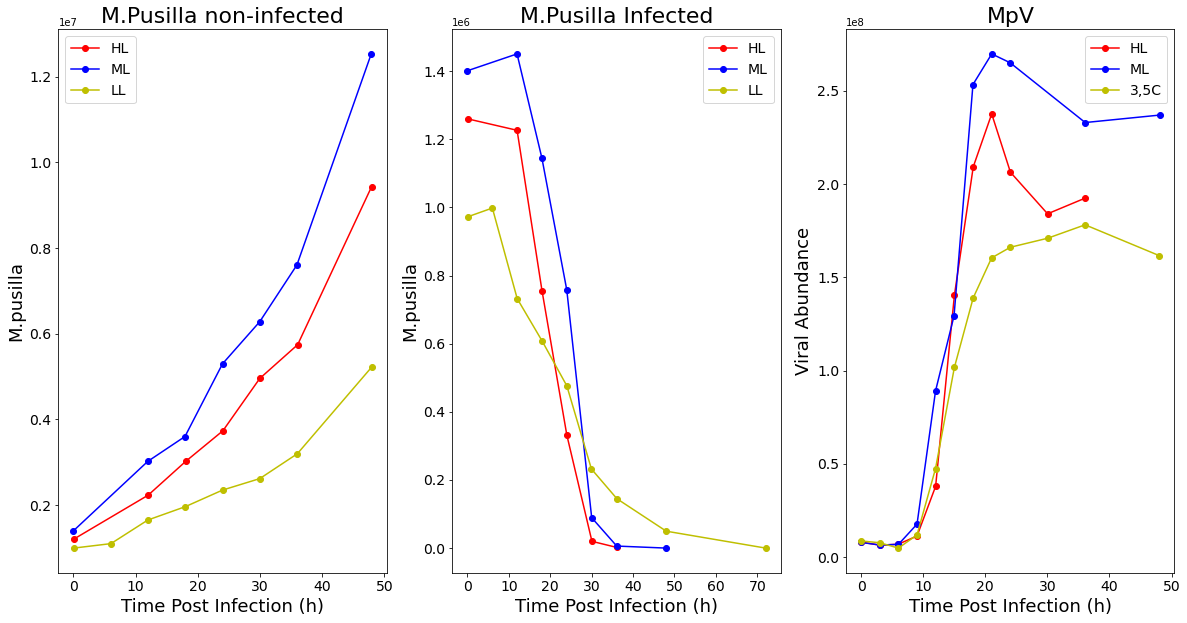

In [17]:

plt.figure(figsize=(20,10)) #creating an empty figure with determined size 

plt.subplot(1,3,1)   
plt.plot(HLcontrol2.time,HLcontrol2.abundance,"-or",label="HL")
plt.plot(MLcontrol2.time,MLcontrol2.abundance,"-ob",label="ML")
plt.plot(LLcontrol2.time,LLcontrol2.abundance,"-oy",label="LL")
plt.legend(prop={"size":14})
plt.title('M.Pusilla non-infected', fontsize = '22')
plt.xlabel('Time Post Infection (h)',fontsize = '18')
plt.ylabel('M.pusilla',fontsize = '18')
plt.xticks(fontsize = 14) 
plt.yticks(fontsize = 14)

plt.subplot(1,3,2)
plt.plot(HLinfected2.time,HLinfected2.abundance,"-or",label="HL")
plt.plot(MLinfected2.time,MLinfected2.abundance,"-ob",label="ML")
plt.plot(LLinfected2.time,LLinfected2.abundance,"-oy",label="LL")
plt.legend(prop={"size":14})
plt.title('M.Pusilla Infected', fontsize = '22')
plt.xlabel('Time Post Infection (h)',fontsize = '18')
plt.ylabel('M.pusilla',fontsize = '18')
plt.xticks(fontsize = 14) 
plt.yticks(fontsize = 14)

plt.subplot(1,3,3)
plt.plot(HLvirus2.time,HLvirus2.abundance,"-or",label="HL")
plt.plot(MLvirus2.time,MLvirus2.abundance,"-ob",label="ML")
plt.plot(LLvirus2.time,LLvirus2.abundance,"-oy",label="3,5C")
plt.legend(prop={"size":14})
plt.title('MpV', fontsize = '22')
plt.xlabel('Time Post Infection (h)',fontsize = '18')
plt.ylabel('Viral Abundance',fontsize = '18') 
plt.xticks(fontsize = 14) 
plt.yticks(fontsize = 14)

plt.show()

**Graphs used to obtain data points (via Data Theif https://datathief.org ) from Maat *et al* 2016**

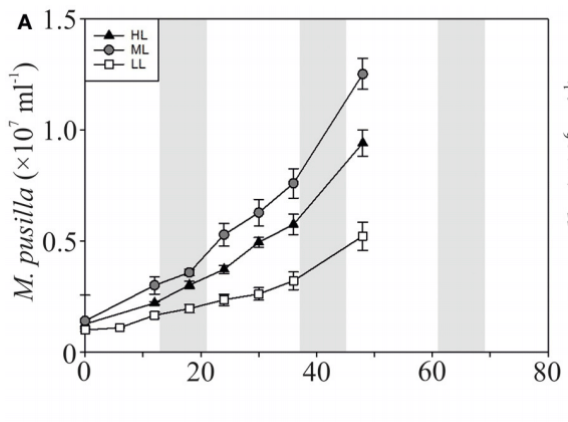

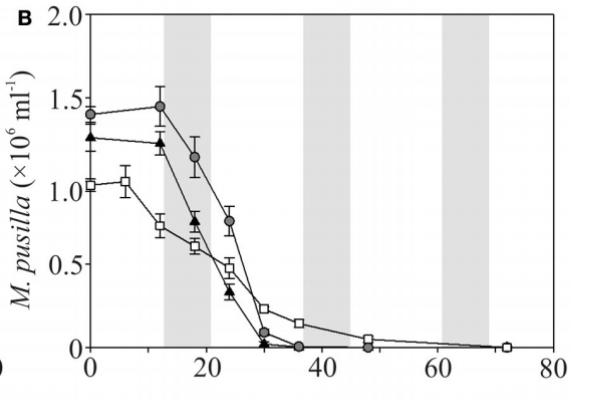

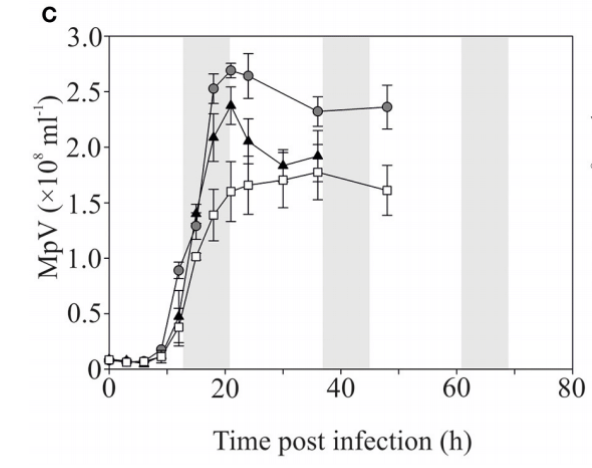

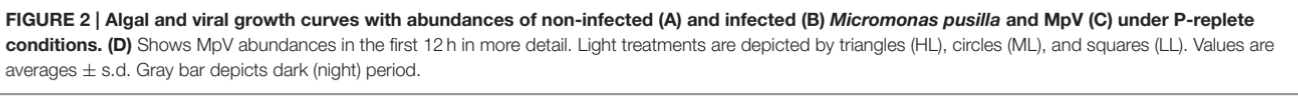

Citation: Maat DS, de Blok R and Brussaard CPD (2016) "Combined Phosphorus Limitation and Light Stress Prevent Viral Proliferation in the Phytoplankton Species Phaeocystis globosa, but Not in Micromonas pusilla." Front. Mar. Sci. 3:160 Doi: 10.3389/fmars.2016.00160



# ODElib, an Introduction 

" ODElib is a python module aimed at expediting the analysis of biological systems with ODE models. This is accomplished by creating a model framework object that automatically creates many of the datastructures needed to evaluate model performance after integration. ODElib is well suited for both theoretical explorations of ODEs and testing model fits given experimental data."  - Spiro Papoulis, ODElib creater

## Installation of ODElib package


Python >=3.7 is required to run ODElib

ODElib can be installed by cloning the repo and installing:
cd /dir/you/want
git clone https://github.com/SEpapoulis/ODElib.git
cd ODElib/
pip install .

Or you can directly install with pip:
pip install git+https://github.com/SEpapoulis/ODElib#egg=ODElib 

## ODE models for data set above

**Model Equations**





$\frac{dS}{dt} = \mu*S - \phi*S*V 
\\
\frac{dI}{dt} = \phi*S*V - \lambda*I
\\
\frac{dV}{dt} = \beta*\lambda*I -\phi*S*V - \delta*V$












**Key parameters**  

μ – host growth rate (day<sup>-1</sup>)  

Φ – clearance rate (ml(virus<sup>-1</sup>)(day<sup>-1</sup>))    

λ – lysis rate (day<sup>-1</sup>)    

β – burst size (viruses host<sup>-1</sup>)    


S - susceptible host  
I - Infected host  
V - free Virus  


## Using ODElib with example models and data

**Importing ODElib for code workspace**

In [18]:
import ODElib 

In [28]:
import numpy as np
import scipy 

In [29]:
###################################################
# define model
###################################################

def holling_one(y,t,ps):
    alpha=ps[0]
    N,H = y[0],y[1]
    dNdt = -alpha*N*H
    dHdt = alpha*N*H
    return [dNdt,dHdt]

###################################################
# initialize model
###################################################

# log-transformed priors
alpha_prior=ODElib.parameter(stats_gen=scipy.stats.lognorm,
                      hyperparameters={'s':1,'scale':1e-6})

# define initial conditions
H0 = single[single['organism']=='H']['abundance'].iloc[0]
N0 = single[single['organism']=='H']['abundance'].iloc[-1] - H0

# initiate class with no infection states
H1=ODElib.ModelFramework(ODE=holling_one,
                          parameter_names=['alpha'],
                          state_names = ['N','H'],
                          dataframe=single,
                          alpha = alpha_prior.copy(),
                          t_steps=288,
                          H = H0,
                          N = N0
                         )
###################################################
# visualize initial parameter guess
###################################################

# setup figure
f,ax = py.subplots(1,2,figsize=[9,4.5])
ax[0].set_xlabel('Time (days)')
ax[1].set_xlabel('Time (days)')
ax[0].set_ylabel('Nutrients (cellular equivalents ml$^{-1}$)')
ax[1].set_ylabel('Cells ml$^{-1}$')
ax[0].semilogy()
ax[1].semilogy()

# plot data
ax[1].errorbar(H1.df.loc['H']['time'],
                            H1.df.loc['H']['abundance'],
                            yerr=H1._calc_stds('H')
                            )

# integrate the model once with initial parameter guess
mod = H1.integrate()

# plot model initial guess
ax[0].plot(H1.times,mod['N'],label='initial guess')
ax[1].plot(H1.times,mod['H'],label='initial guess')
###################################################
# run model
###################################################

# call the MCMC algorithm
posteriors = H1.MCMC(iterations_per_chain=1000,
                       cpu_cores=2,fitsurvey_samples=1000,sd_fitdistance=20.0)

# set optimal parameters
im = posteriors.loc[posteriors.chi==min(posteriors.chi)].index[0]
pdic = posteriors.loc[im][H1.get_pnames()].to_dict()
H1.set_parameters(**posteriors.loc[im][H1.get_pnames()].to_dict())

# run the model again, now with fitted parameters
mod = H1.integrate()

# plot fitted model
ax[0].plot(H1.times,mod['N'],label='fitted')
ax[1].plot(H1.times,mod['H'],label='fitted')

# legend
l = ax[1].legend()
l.draw_frame(False)

py.show()


TypeError: 'type' object is not subscriptable